In [1]:
print("Hello, Harichandana! Your JupyterLab is working.")

Hello, Harichandana! Your JupyterLab is working.


In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [3]:
# Step 2: Load the dataset
iris = datasets.load_iris()

# Convert to DataFrame for easy viewing
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Show first few rows
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Step 3: Explore the data
print("Shape of X:", X.shape)
print("Unique species labels:", iris.target_names)
print("\nSample counts per species:")
print(pd.Series(iris.target).value_counts())

Shape of X: (150, 4)
Unique species labels: ['setosa' 'versicolor' 'virginica']

Sample counts per species:
0    50
1    50
2    50
Name: count, dtype: int64


Summary statistics:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


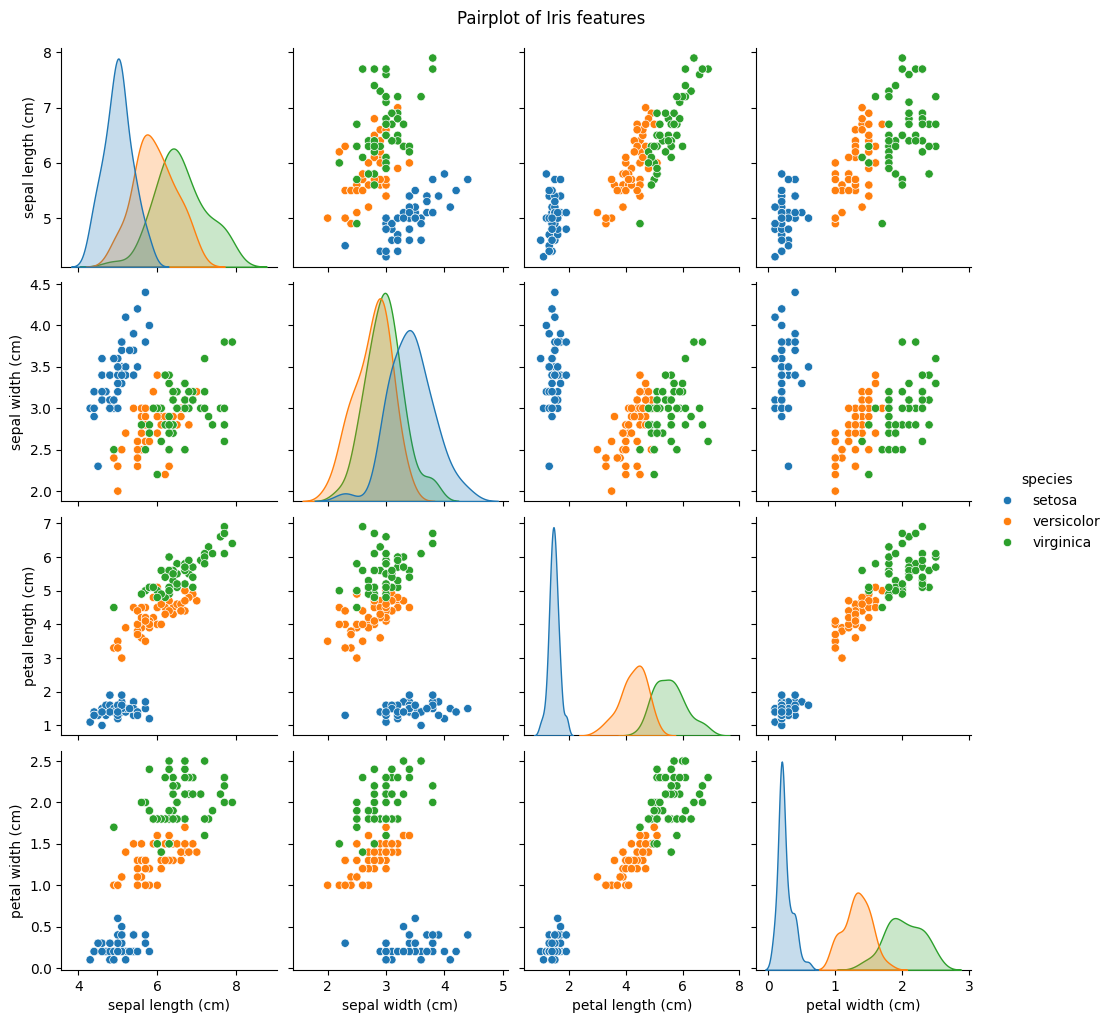

In [5]:
# Step 4: Visualize the dataset
# Combine features and species labels for plotting
df = pd.concat([X, y], axis=1)
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 1️⃣ Show summary statistics
print("Summary statistics:\n")
print(df.describe())

# 2️⃣ Pairplot: relationships between features
sns.pairplot(df, hue='species', vars=iris.feature_names)
plt.suptitle("Pairplot of Iris features", y=1.02)
plt.show()

In [6]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (120, 4)
Testing data shape: (30, 4)


In [7]:
# Step 6: Standardize (scale) the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Step 7: Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

print("✅ Model training complete!")

✅ Model training complete!


In [9]:
# Step 8: Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
# Step 9: Save the trained model and scaler
joblib.dump(model, "iris_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!


In [11]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'iris_classification.ipynb', 'iris_model.pkl', 'scaler.pkl', 'venv']
